가설 1

가정: 조류인플루엔자는 겨울에 가장 많이 발생할 것이다. 

귀무가설: 겨울의 AI 발생건수는 다른계절의 발생건수 합보다 작다.

대립가설: 겨울의 AI 발생건수는 다른계절의 발생건수 합보다 크다.

근거: 조류인플루엔자는 대부분 야생에 사는 새들의 감기가 가축화 된 닭이나 오리에게 전염돼 발생한 것이다. 한 해 동안 우리나라를 찾아오는 겨울 철새는 대략 126만 마리. 때문에 우리나라는 철새 위험시기에 의한 특별방역대책기간을 정해놓고 있기도 하다.이러한 이유로 철새가 북상하는 겨울에 조류인플루엔자 발생 건수가 높을 것으로 예측할 수 있다.


In [1]:
import weatherAPI
import pandas as pd
import numpy as np
import datetime
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy import stats

In [2]:
AI=pd.read_csv("HPAIOccurlist_final.csv")
AI_occur=AI.copy()

In [3]:
AI_occur.drop(columns=['축종'],inplace=True)
AI_occur.drop(columns=['사육수'],inplace=True)
AI_occur.drop(columns=['진단일'],inplace=True)

In [4]:
AI_occur.head()

,주소,발생일,지역코드
0,충청북도 음성군 삼성면 용성리,20031212,127
1,충청북도 음성군 삼성면 덕정리,20031217,127
2,충청북도 음성군 삼성면 용성리,20031219,127
3,경상북도 경주시 안강읍 육통리,20031221,138
4,전라남도 나주시 산포면 매성리,20031221,156


In [5]:
AI_occur.info()
#총 발생건수 1122건 2003.12-2021.04

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주소      1122 non-null   object
 1   발생일     1122 non-null   int64 
 2   지역코드    1122 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 26.4+ KB


In [6]:
AI_occur.count()

주소      1122
발생일     1122
지역코드    1122
dtype: int64

In [7]:
AI_occur.isnull().sum()

주소      0
발생일     0
지역코드    0
dtype: int64

In [8]:
#발생일 문자타입으로 변환.
AI_occur['발생일']=AI_occur['발생일'].astype('str')
AI_occur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주소      1122 non-null   object
 1   발생일     1122 non-null   object
 2   지역코드    1122 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 26.4+ KB


In [9]:
AI_occur['datetime'] =AI_occur['발생일'].apply(lambda x: pd.to_datetime(str(x), format='%Y/%m/%d'))
AI_occur

,주소,발생일,지역코드,datetime
0,충청북도 음성군 삼성면 용성리,20031212,127,2003-12-12
1,충청북도 음성군 삼성면 덕정리,20031217,127,2003-12-17
2,충청북도 음성군 삼성면 용성리,20031219,127,2003-12-19
3,경상북도 경주시 안강읍 육통리,20031221,138,2003-12-21
4,전라남도 나주시 산포면 매성리,20031221,156,2003-12-21
...,...,...,...,...
1117,전라남도 장흥군 장평면 기동리,20210321,260,2021-03-21
1118,전라남도 장흥군 장평면 기동리,20210322,260,2021-03-22
1119,전라남도 나주시 산포면 등수리,20210323,156,2021-03-23
1120,전라남도 장흥군 장평면 양촌리,20210406,260,2021-04-06


In [10]:
# DataFrame의 index 변형하기
AI_occur.set_index('datetime', inplace=True) 
AI_occur

,주소,발생일,지역코드
datetime,,,
2003-12-12,충청북도 음성군 삼성면 용성리,20031212,127
2003-12-17,충청북도 음성군 삼성면 덕정리,20031217,127
2003-12-19,충청북도 음성군 삼성면 용성리,20031219,127
2003-12-21,경상북도 경주시 안강읍 육통리,20031221,138
2003-12-21,전라남도 나주시 산포면 매성리,20031221,156
...,...,...,...
2021-03-21,전라남도 장흥군 장평면 기동리,20210321,260
2021-03-22,전라남도 장흥군 장평면 기동리,20210322,260
2021-03-23,전라남도 나주시 산포면 등수리,20210323,156


In [11]:
AI_occur['month']=AI_occur.index.month
AI_occur['year']=AI_occur.index.year
AI_occur

,주소,발생일,지역코드,month,year
datetime,,,,,
2003-12-12,충청북도 음성군 삼성면 용성리,20031212,127,12,2003
2003-12-17,충청북도 음성군 삼성면 덕정리,20031217,127,12,2003
2003-12-19,충청북도 음성군 삼성면 용성리,20031219,127,12,2003
2003-12-21,경상북도 경주시 안강읍 육통리,20031221,138,12,2003
2003-12-21,전라남도 나주시 산포면 매성리,20031221,156,12,2003
...,...,...,...,...,...
2021-03-21,전라남도 장흥군 장평면 기동리,20210321,260,3,2021
2021-03-22,전라남도 장흥군 장평면 기동리,20210322,260,3,2021
2021-03-23,전라남도 나주시 산포면 등수리,20210323,156,3,2021


In [12]:
#년월-발생건수
#같은날 발생했어도 중복 없이 카운트 확인완료.
AI_occur_year_month=AI_occur.groupby(['year', 'month'])['발생일'].count()
AI_occur_year_month.head()

year  month
2003  12       19
2004  1         3
      2         1
      3         2
2006  11        3
Name: 발생일, dtype: int64

In [13]:
#월-발생건수
AI_occur_month=AI_occur.groupby(['month'])['발생일'].count()
AI_occur_month

month
1     226
2     181
3     128
4      55
5      33
6      44
7       4
9      18
10     24
11     82
12    327
Name: 발생일, dtype: int64

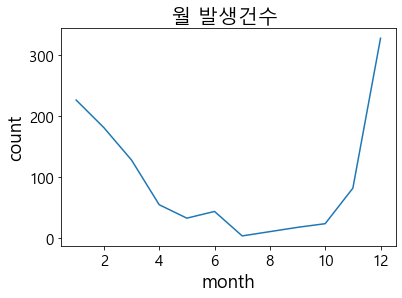

In [110]:
#그래프 관련
import matplotlib.pyplot as plt
import seaborn as sns

#2003.12~2021.04 월별 발생건수 총합
AI_occur_month.plot()

#폰트적용
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams.update({'font.size' : 15})
#
plt.title('월 발생건수 ', fontsize=20)
plt.xlabel('month', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.show()

In [15]:
#month 타입 문자로 변경

AI_occur['month']=AI_occur['month'].astype('str')

In [16]:
#각 월 마다 추출

jan=AI_occur[AI_occur['month']=='1']
fed=AI_occur[AI_occur['month']=='2']
mar=AI_occur[AI_occur['month']=='3']
apr=AI_occur[AI_occur['month']=='4']
may=AI_occur[AI_occur['month']=='5']
jun=AI_occur[AI_occur['month']=='6']
jul=AI_occur[AI_occur['month']=='7']
aug=AI_occur[AI_occur['month']=='8']
sep=AI_occur[AI_occur['month']=='9']
octo=AI_occur[AI_occur['month']=='10']
nov=AI_occur[AI_occur['month']=='11']
dec=AI_occur[AI_occur['month']=='12']

In [147]:
jan.count()

주소       226
발생일      226
지역코드     226
month    226
year     226
dtype: int64

In [17]:
#계절로 합치기

spring=pd.concat([mar,apr,may], sort=True)
spring=spring.reindex(columns = ['month','year','발생일'])

summer=pd.concat([jun,jul,aug], sort=True)
summer=summer.reindex(columns = ['month','year','발생일'])

fall=pd.concat([sep,octo,nov], sort=True)
fall=fall.reindex(columns = ['month','year','발생일'])

winter=pd.concat([dec,jan,fed], sort=True)
winter=winter.reindex(columns = ['month','year','발생일'])

season=pd.concat([spring,summer,fall,winter], sort=True)
season=season.reindex(columns = ['month','year','발생일'])

In [18]:
#봄,여름,가을 합치기
not_winter= pd.concat([spring,summer,fall], sort=True)
not_winter.count()

month    388
year     388
발생일      388
dtype: int64

In [19]:
# 4계절 발생 건수.
print(season.count())

month    1122
year     1122
발생일      1122
dtype: int64


In [20]:
#표본평균 구하기(4계절 발생 건수)
season_sm=1122/4
season_sm

280.5

In [21]:
#표본평균*2 값 구하기.
season_sm2=280.5*2
season_sm2

561.0

In [22]:
#겨울 발생건수
winter_co=winter['발생일'].count()
winter_co

734

In [23]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 734 entries, 2003-12-12 to 2021-02-26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   734 non-null    object
 1   year    734 non-null    int64 
 2   발생일     734 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.9+ KB


In [24]:
winter_v=winter['year']

In [25]:
winter_i=len(winter)
winter_i

734

In [26]:
from scipy import stats
stats.ttest_1samp(winter_i,561)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_1sampResult(statistic=nan, pvalue=nan)

In [27]:
result_winter=stats.ttest(winter['발생일'].count(),561)

AttributeError: module 'scipy.stats' has no attribute 'ttest'

In [28]:
#표준오차 구하기
season_sigma=sp.std(season, ddof=1)
season_se=season_sigma/sp.sqrt(len(season))
season_se

<ipython-input-28-296c8b8ad2cd>:2: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  season_sigma=sp.std(season, ddof=1)
<ipython-input-28-296c8b8ad2cd>:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  season_se=season_sigma/sp.sqrt(len(season))


year    0.099156
dtype: float64

In [29]:
#각 발생건수

print(winter.count()) #겨울
print(not_winter.count()) #봄,여름,가을
print(season_average)     #봄,여름,가을,겨울
print(season_average*2)  

month    734
year     734
발생일      734
dtype: int64
month    388
year     388
발생일      388
dtype: int64


NameError: name 'season_average' is not defined

가설2 

가정: 아생조류 개체수가 많아지면 AI발생건수가 많아질 것이다.

귀무가설: 야생조류 개체수와 AI발생건수는 상관관계가 없다.

대립가설: 야생조류 개체수와 AI발생건수는 상관관계가 있다.

In [30]:
import pandas as pd
df=pd.read_csv("wild brids_species.csv")
brids_species=df.copy()
brids_species.head()

,구분,2003년,2004년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,...,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,평균
0,관찰지역수,116,117,122,126,127,140,142,172,193,...,193,194,75,200,200,196,200,200,206,163.74
1,합계,971176,1109531,1175808,1184287,1577499,1459277,1914446,1445152,1248740,...,1106287,1256065,974685,1568527,1320000,1432843,1469859,1629083,1478060,1338074.05
2,들꿩,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,4,1,0.47
3,멧닭,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.00
4,메추라기,3,5,14,14,13,17,18,18,18,...,37,6,10,0,4,5,11,3,4,11.00


In [31]:
brids_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      576 non-null    object 
 1   2003년   576 non-null    int64  
 2   2004년   576 non-null    int64  
 3   2005년   576 non-null    int64  
 4   2006년   576 non-null    int64  
 5   2007년   576 non-null    int64  
 6   2008년   576 non-null    int64  
 7   2009년   576 non-null    int64  
 8   2010년   576 non-null    int64  
 9   2011년   576 non-null    int64  
 10  2012년   576 non-null    int64  
 11  2013년   576 non-null    int64  
 12  2014년   576 non-null    int64  
 13  2015년   576 non-null    int64  
 14  2016년   576 non-null    int64  
 15  2017년   576 non-null    int64  
 16  2018년   576 non-null    int64  
 17  2019년   576 non-null    int64  
 18  2020년   576 non-null    int64  
 19  2021년   576 non-null    int64  
 20  평균      576 non-null    float64
dtypes: float64(1), int64(19), object(1)
mem

In [32]:
brids_species.head()

,구분,2003년,2004년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,...,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,평균
0,관찰지역수,116,117,122,126,127,140,142,172,193,...,193,194,75,200,200,196,200,200,206,163.74
1,합계,971176,1109531,1175808,1184287,1577499,1459277,1914446,1445152,1248740,...,1106287,1256065,974685,1568527,1320000,1432843,1469859,1629083,1478060,1338074.05
2,들꿩,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,4,1,0.47
3,멧닭,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.00
4,메추라기,3,5,14,14,13,17,18,18,18,...,37,6,10,0,4,5,11,3,4,11.00


In [33]:
brids_total=brids_species.iloc[1,:]
brids_total

구분                합계
2003년         971176
2004년        1109531
2005년        1175808
2006년        1184287
2007년        1577499
2008년        1459277
2009년        1914446
2010년        1445152
2011년        1248740
2012년        1102082
2013년        1106287
2014년        1256065
2015년         974685
2016년        1568527
2017년        1320000
2018년        1432843
2019년        1469859
2020년        1629083
2021년        1478060
평균       1.33807e+06
Name: 1, dtype: object

In [34]:
brids_total=brids_total.to_frame()
brids_total.columns=[ '개체수']
brids_total.head()

,개체수
구분,합계
2003년,971176
2004년,1109531
2005년,1175808
2006년,1184287


In [35]:
brids_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 구분 to 평균
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   개체수     21 non-null     object
dtypes: object(1)
memory usage: 976.0+ bytes


In [36]:
brids_total.head()

,개체수
구분,합계
2003년,971176
2004년,1109531
2005년,1175808
2006년,1184287


In [37]:
brids_total.drop(['구분','평균'],inplace=True)
brids_total.head()

,개체수
2003년,971176
2004년,1109531
2005년,1175808
2006년,1184287
2007년,1577499


In [38]:
brids_total.index = ['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
print(brids_total.index)
brids_total.index.name='year'
print(brids_total.index)

Index(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')
Index(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object', name='year')


In [39]:
brids_total['개체수']

year
2003     971176
2004    1109531
2005    1175808
2006    1184287
2007    1577499
2008    1459277
2009    1914446
2010    1445152
2011    1248740
2012    1102082
2013    1106287
2014    1256065
2015     974685
2016    1568527
2017    1320000
2018    1432843
2019    1469859
2020    1629083
2021    1478060
Name: 개체수, dtype: object

In [45]:
brids_total.index.name='year'
brids_total.head()

,개체수
year,
2003,971176
2004,1109531
2005,1175808
2006,1184287
2007,1577499


In [61]:
AI_occur_year=AI_occur_year.to_frame()
AI_occur_year.columns=[ '발생건수']
AI_occur_year.head()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [62]:
AI_occur_year

,발생건수
year,
2003,19
2004,6
2006,6
2007,4
2008,45
2010,3
2011,51
2014,280
2015,141


In [52]:
#문자로 맞쳐주기.
#AI_occur_year.index.astype('str')

In [63]:
brids_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2003 to 2021
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   개체수     19 non-null     object
dtypes: object(1)
memory usage: 944.0+ bytes


In [81]:
AI_occur_year.sort_values(by='발생건수')
AI_occur_year.reset_index(inplace=True)

In [88]:
AI_occur_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    14 non-null     int64
 1   발생건수    14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


In [66]:
brids_total.sort_values(by='개체수')

,개체수
year,
2003,971176
2015,974685
2012,1102082
2013,1106287
2004,1109531
2005,1175808
2006,1184287
2011,1248740
2014,1256065


In [75]:
brids_total_i=brids_total.astype('int').reset_index()

In [76]:
brids_total_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    19 non-null     object
 1   개체수     19 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 356.0+ bytes


In [71]:
# 정규성 검정  > 대립가설(정규화 따르지 않는다) 채택
test_stat, p_value = stats.shapiro(AI_occur_year)
print("test_stat: %f, pvalue=%f"%(test_stat, p_value))
test_stat, p_value = stats.shapiro(brids_total_i)
print("test_stat: %f, pvalue=%f"%(test_stat, p_value))

test_stat: 0.756360, pvalue=0.001513
test_stat: 0.957399, pvalue=0.522289


In [83]:
# 독립성 검정  > 귀무가설(두 변수는 서로 독립적이다) 채택
crosstab=pd.crosstab(AI_occur_year['발생건수'],brids_total_i['개체수'])
chi2 = stats.chi2_contingency(crosstab)
print("test_stat: %f, pvalue=%f"%(chi2[0], chi2[1]))
#pvalue 5%이상 귀무가설

test_stat: 168.000000, pvalue=0.241899


In [86]:
# 비정규 데이터, 분산 검정(Levene's Test 이용) > 귀무가설(k개의 집단에 분산이 동일) 채택
test_stat, p_value = stats.levene(AI_occur_year['발생건수'],brids_total_i['개체수'])
print("test_stat: %f, pvalue=%f"%(test_stat, p_value))
# pvalue 유의수준 5%이내면 귀무가설 기각

test_stat: 31.934719, pvalue=0.000003


In [91]:
# 비모수적 데이터 이며 독립적이므로 Mann-Whitney U test 이용 (크기 차이 알수 없음)
result_temp=stats.mannwhitneyu(AI_occur_year['발생건수'],brids_total_i['개체수'])


MannwhitneyuResult(statistic=0.0, pvalue=6.935973835633591e-07)

In [92]:
print("u검정 통계량: %.3f, pvalue=%.3f"%(result_temp))   # 유의수준 5%내이므로 귀무가설 기각 대립가설 채택

u검정 통계량: 0.000, pvalue=0.000


가설3


데이터셋1= 발생년도-월-일 (10,11,12,1,2,3)
데이터셋2= 야생조류 종 및 개체수 합계 (10,11,12,1,2,3) 철새가 적은 달 많은 달.(쪼개기)
->
데이터셋 자체에 지역이 들어가야 한다.

가정: 조류수가 많을 수록 발생건수가 많다. (이건 너무 당연하다. - 자꾸 파다보면 왜 파는지를 모른다.)

귀무가설: 야생조류 개체수와 AI 월 별 발생건수는 양의 상관관계가 없다. 

대립가설: 야생조류 개체수와 AI 월 별 발생건수는 양의 상관관계가 있다.

유의수준=

In [98]:
import pandas as pd

wild_birds_14=pd.read_csv("wild birds_2014.csv")
wild_birds_15=pd.read_csv("wild birds_2015.csv")
wild_birds_16=pd.read_csv("wild birds_2016.csv")
wild_birds_17=pd.read_csv("wild birds_2017.csv")
wild_birds_18=pd.read_csv("wild birds_2018.csv")
wild_birds_19=pd.read_csv("wild birds_2019.csv")
wild_birds_20=pd.read_csv("wild birds_2020.csv")

In [121]:
wild_bird14=wild_birds_14.set_index(['구분'])
wild_bird15=wild_birds_15.set_index(['구분'])
wild_bird16=wild_birds_16.set_index(['구분'])
wild_bird17=wild_birds_17.set_index(['구분'])
wild_bird18=wild_birds_18.set_index(['구분'])
wild_bird19=wild_birds_19.set_index(['구분'])
wild_bird20=wild_birds_20.set_index(['구분'])

In [123]:
wild_bird14

,Oct-14,Nov-14,Dec-14,Jan-15,Feb-15,Mar-15,평균
구분,,,,,,,
관찰지역수,75,75,200,75,75,75,95.83
합계,617312,1038700,1111763,974685,675607,839772,876306.50
들꿩,0,0,0,0,0,0,0.00
멧닭,0,0,0,0,0,0,0.00
메추라기,4,9,18,10,11,5,9.50
...,...,...,...,...,...,...,...
미동정 소형도요류,0,0,0,0,0,0,0.00
미동정 중형도요류,0,0,0,0,0,0,0.00
미동정 도요류,0,0,0,0,0,0,0.00


In [125]:
df=pd.concat([wild_bird14,wild_bird15,wild_bird16,wild_bird17,wild_bird18,wild_bird19,wild_bird20], axis=1)

In [127]:
df.head()

,Oct-14,Nov-14,Dec-14,Jan-15,Feb-15,Mar-15,평균,Oct-15,Nov-15,Dec-15,...,Feb-20,Mar-20,평균,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,평균
관찰지역수,75.0,75.0,200.0,75.0,75.0,75.0,95.83,75.0,75.0,200.0,...,80.0,80.0,120.00,80.0,112.0,206.0,206.0,111.0,111.0,137.67
합계,617312.0,1038700.0,1111763.0,974685.0,675607.0,839772.0,876306.50,483382.0,778868.0,1764969.0,...,923296.0,380384.0,1011191.33,575277.0,944700.0,1571494.0,1478060.0,858236.0,472276.0,983340.50
들꿩,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.83,0.0,0.0,3.0,1.0,2.0,4.0,1.67
멧닭,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
메추라기,4.0,9.0,18.0,10.0,11.0,5.0,9.50,2.0,9.0,10.0,...,0.0,0.0,4.33,0.0,2.0,2.0,4.0,3.0,3.0,2.33


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 관찰지역수 to nan
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Oct-14  576 non-null    float64
 1   Nov-14  576 non-null    float64
 2   Dec-14  576 non-null    float64
 3   Jan-15  576 non-null    float64
 4   Feb-15  576 non-null    float64
 5   Mar-15  576 non-null    float64
 6   평균      576 non-null    float64
 7   Oct-15  576 non-null    float64
 8   Nov-15  576 non-null    float64
 9   Dec-15  576 non-null    float64
 10  Jan-16  576 non-null    float64
 11  Feb-16  576 non-null    float64
 12  Mar-16  576 non-null    float64
 13  평균      576 non-null    float64
 14  Oct-16  576 non-null    float64
 15  Nov-16  576 non-null    float64
 16  Dec-16  576 non-null    float64
 17  Jan-17  576 non-null    float64
 18  Feb-17  576 non-null    float64
 19  Mar-17  576 non-null    float64
 20  평균      576 non-null    float64
 21  Oct-17  576 non-null    float64
 22  Nov

In [130]:
df_total=df.iloc[1,:]
df_total

Oct-14     617312.00
Nov-14    1038700.00
Dec-14    1111763.00
Jan-15     974685.00
Feb-15     675607.00
Mar-15     839772.00
평균         876306.50
Oct-15     483382.00
Nov-15     778868.00
Dec-15    1764969.00
Jan-16    1568527.00
Feb-16     875838.00
Mar-16     438506.00
평균         985015.00
Oct-16     500205.00
Nov-16     905642.00
Dec-16    1188443.00
Jan-17    1320000.00
Feb-17     890509.00
Mar-17     413302.00
평균         869683.50
Oct-17     382817.00
Nov-17     607613.00
Dec-17    1069951.00
Jan-18    1432843.00
Feb-18     968497.00
Mar-18     414952.00
평균         812778.83
Oct-18     454906.00
Nov-18     757778.00
Dec-18    1320063.00
Jan-19    1469859.00
Feb-19     713814.00
Mar-19     368329.00
평균         847458.17
Oct-19     611490.00
Nov-19     705740.00
Dec-19    1817155.00
Jan-20    1629083.00
Feb-20     923296.00
Mar-20     380384.00
평균        1011191.33
Oct-20     575277.00
Nov-20     944700.00
Dec-20    1571494.00
Jan-21    1478060.00
Feb-21     858236.00
Mar-21     47

In [142]:
df_total.cloumns=['합계']

In [143]:
df_total.index.name='월-년도'
df_total.index

Index(['Oct-14', 'Nov-14', 'Dec-14', 'Jan-15', 'Feb-15', 'Mar-15', '평균',
       'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16', '평균',
       'Oct-16', 'Nov-16', 'Dec-16', 'Jan-17', 'Feb-17', 'Mar-17', '평균',
       'Oct-17', 'Nov-17', 'Dec-17', 'Jan-18', 'Feb-18', 'Mar-18', '평균',
       'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', '평균',
       'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', '평균',
       'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', '평균'],
      dtype='object', name='월-년도')

In [144]:
df_total

월-년도
Oct-14     617312.00
Nov-14    1038700.00
Dec-14    1111763.00
Jan-15     974685.00
Feb-15     675607.00
Mar-15     839772.00
평균         876306.50
Oct-15     483382.00
Nov-15     778868.00
Dec-15    1764969.00
Jan-16    1568527.00
Feb-16     875838.00
Mar-16     438506.00
평균         985015.00
Oct-16     500205.00
Nov-16     905642.00
Dec-16    1188443.00
Jan-17    1320000.00
Feb-17     890509.00
Mar-17     413302.00
평균         869683.50
Oct-17     382817.00
Nov-17     607613.00
Dec-17    1069951.00
Jan-18    1432843.00
Feb-18     968497.00
Mar-18     414952.00
평균         812778.83
Oct-18     454906.00
Nov-18     757778.00
Dec-18    1320063.00
Jan-19    1469859.00
Feb-19     713814.00
Mar-19     368329.00
평균         847458.17
Oct-19     611490.00
Nov-19     705740.00
Dec-19    1817155.00
Jan-20    1629083.00
Feb-20     923296.00
Mar-20     380384.00
평균        1011191.33
Oct-20     575277.00
Nov-20     944700.00
Dec-20    1571494.00
Jan-21    1478060.00
Feb-21     858236.00
Mar-21  

In [158]:
AI_occur_year_month=AI_occur.groupby(['year', 'month'])['발생일'].count()
AI_occur_year_month

year  month
2003  12        19
2004  1          3
      2          1
      3          2
2006  11         3
      12         3
2007  1          2
      2          1
      3          1
2008  4         23
      5         22
2010  12         3
2011  1         38
      2          8
      3          3
      4          1
      5          1
2014  1         58
      10        17
      11         7
      12         7
      2        101
      3         53
      4         12
      5          4
      6          6
      7          4
      9         11
2015  1         38
      10         7
      11         3
      2         35
      3         29
      4         14
      5          6
      6          2
      9          7
2016  11        66
      12       247
      3          1
      4          1
2017  1         29
      11         1
      12         7
      2         13
      3         29
      4          2
      6         36
2018  1          8
      2          2
      3          4
2020  11         2


In [160]:
AI_occur_year_month_df=AI_occur_year.to_frame()

AttributeError: 'DataFrame' object has no attribute 'to_frame'